In [1]:
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#generate some data 
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [3]:
#each feature will have zero mean
X = X - np.mean(X, axis=0)

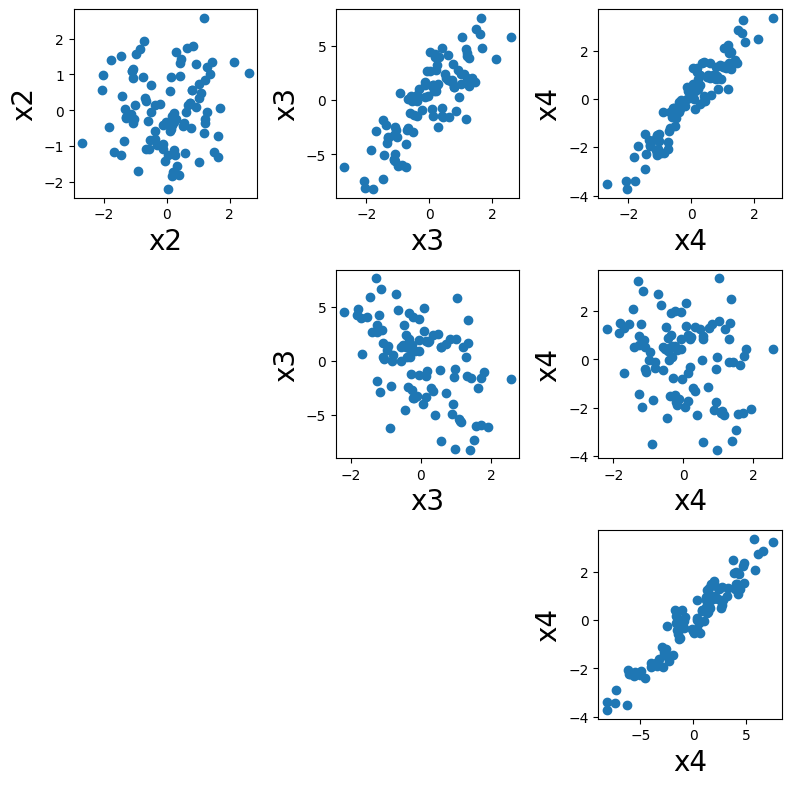

In [5]:
plt.figure(figsize=(10,10))
for i in range(4): 
        for j in range(4):
            if j > i: 
                plt.subplot(4,4,i*4+j+1)
                plt.scatter(X[:,i], X[:,j])
                plt.xlabel(f'x{j+1}', fontsize=20)
                plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [6]:
#Initialize 
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

In [8]:
#get principal components 
principal_comps_builtin = pca.components_.T

In [9]:
#print, each principal component 
for i, component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[ 0.21796251 -0.11895143  0.88769919  0.38772807]

principal component 1
[ 0.48318498  0.80143177 -0.150469    0.31874517]

principal component 2
[-0.1903524  -0.29656257 -0.36870068  0.86016069]

principal component 3
[ 0.82631143 -0.50557722 -0.23110396 -0.09050995]



In [10]:
#compute covariance matrix
##https://www.youtube.com/watch?v=F-aku750poM
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100

In [13]:
#eigenvalues and evigenvectors of covariance matrix 
eigvecs = np.linalg.eig(cov_matrix)

In [14]:
#sort order by magnitude of eigenvalue 
ordering = np.argsort(eigvecs[0])[::-1]

In [15]:
#get eigenvectors 
principal_comps_byhand = eigvecs[1][:, ordering]

In [16]:
#our by-hand eigenvectors 
principal_comps_byhand

array([[ 0.21796251,  0.48318498, -0.1903524 ,  0.82631143],
       [-0.11895143,  0.80143177, -0.29656257, -0.50557722],
       [ 0.88769919, -0.150469  , -0.36870068, -0.23110396],
       [ 0.38772807,  0.31874517,  0.86016069, -0.09050995]])

In [17]:
principal_comps_builtin

array([[ 0.21796251,  0.48318498, -0.1903524 ,  0.82631143],
       [-0.11895143,  0.80143177, -0.29656257, -0.50557722],
       [ 0.88769919, -0.150469  , -0.36870068, -0.23110396],
       [ 0.38772807,  0.31874517,  0.86016069, -0.09050995]])